# 1) Perform Clustering (Hierarchical, K-Means, DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Data Description:
#### Murder -- Muder rates in different places of United States
#### Assualt- Assualt rate in different places of United States
#### UrbanPop - urban population in different places of United States
#### Rape - Rape rate in different places of United States

In [1]:
#Importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime=pd.read_csv('C:/Users/ancha/Downloads/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [3]:
crime.rename(columns={'Unnamed: 0': 'State'}, inplace=True )
crime

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
crime_scaled=scaler.fit_transform(crime.iloc[:,1:])
crime_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Hierarchical Clustering:

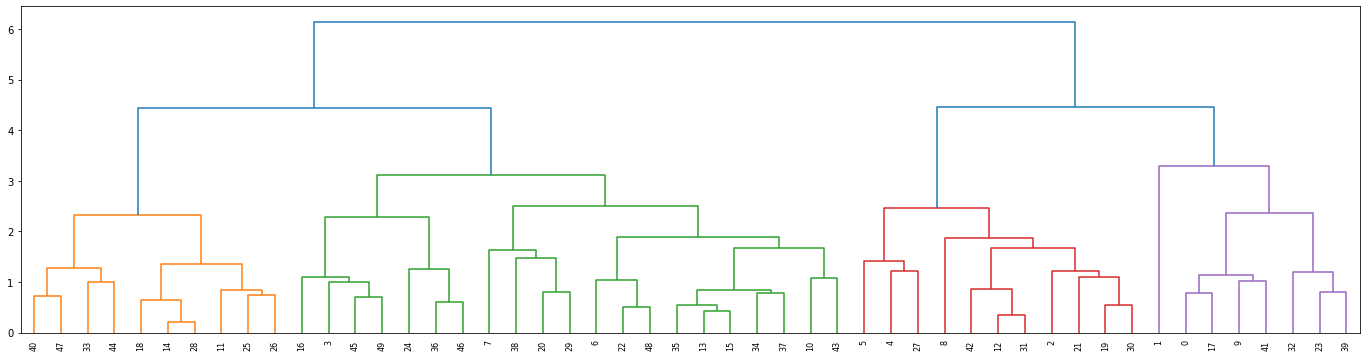

In [7]:
#Create Dendrogram
plt.figure(figsize=(24,6))
dendrogram= sch.dendrogram(sch.linkage(crime_scaled,method='complete'))

In [8]:
#Creating clusters
hc= AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [9]:
#Save clusters for chart
y_hc= hc.fit_predict(crime_scaled)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [10]:
crime_hierarchical=crime.copy()

#Adding clusterid column
crime_hierarchical['h_clusterid']=y_hc
crime_hierarchical.head()

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [11]:
crime_hierarchical[crime_hierarchical['h_clusterid']==0]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [12]:
crime_hierarchical[crime_hierarchical['h_clusterid']==1]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [13]:
crime_hierarchical[crime_hierarchical['h_clusterid']==2]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2
31,New York,11.1,254,86,26.1,2


In [14]:
crime_hierarchical[crime_hierarchical['h_clusterid']==3]

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3


In [15]:
crime_hierarchical.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


It is optimized that,the similar data points in one cluster and dissimilar data points in different clusters.
We get the idea after grouping the clusters and see the mean,that these many clusters are good to go.

# K-Means Method:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\Users\ancha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[200.0, 104.96163315756871, 80.0888613219962, 57.55425863091104, 50.52026552535068, 43.92746404497574, 40.52183461131976, 34.6873883978491, 32.70648136388185, 28.311639397122555]


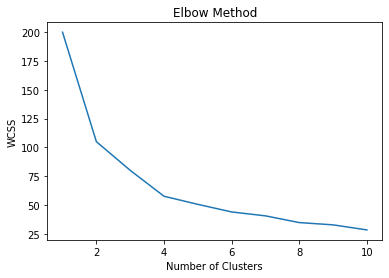

In [32]:
#Elbow method. WCSS- Within clusters sum of squares

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state =0)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As per above method, from 4 or maybe 5 clusters there is no dropping of variance,so from there we can check the mean and decide the number of clusters accordingly.

In [18]:
#Build cluster algorithm

cluster_new= KMeans(4,random_state=0)
cluster_new.fit(crime_scaled)

KMeans(n_clusters=4, random_state=0)

In [19]:
cluster_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [20]:
crime_kmeans=crime.copy()
crime_kmeans['kmeans_clusterid']=cluster_new.labels_
crime_kmeans.head()

,State,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [21]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==0]

,State,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [22]:
crime_kmeans.groupby('kmeans_clusterid').mean().reset_index()

,kmeans_clusterid,Murder,Assault,UrbanPop,Rape
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


From above's method and mean of the clusters,we can say 4 clusters are good to go.

# DBSCAN Method:

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [33]:
scaler= StandardScaler()
crime_scaled=scaler.fit_transform(crime.iloc[:,1:])
crime_scaled


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [34]:
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_scaled)

DBSCAN(eps=1, min_samples=4)

In [35]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [36]:
crime_dbscan=crime.copy()
crime_dbscan['dbscan_clusterid']=dbscan.labels_
crime_dbscan['dbscan_clusterid'].value_counts()

 1    28
-1    18
 0     4
Name: dbscan_clusterid, dtype: int64

In [37]:
#Percentage of noise points.
(len(crime_dbscan[crime_dbscan['dbscan_clusterid']==-1])/len(crime_dbscan))*100

36.0

In [38]:
#Silhouette score.
crime_scaled=metrics.silhouette_score(crime_scaled,dbscan.labels_)
crime_scaled

0.2051154919322

Hierarchical and K-Means are almost same in considering the number of clusters. DBSCAN clustering performance is low compared with Hierarchical and K-means because it is not placing similar points in one clusters, and also it has many noise points. And,the Silhouette score (Ranges from -1 to 1) should be towards +1 but it is going towards 0 or -1. 

# 2) Perform clustering (Hierarchical, K-Means and DBSCAN) for the airlines data to obtain optimum number of clusters.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. 
The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months: 
    
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months: 
    
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [50]:
airlines=pd.read_excel('C:/Users/ancha/Downloads/EastWestAirlines.xlsx')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## EDA

In [51]:
airlines.drop(['ID#'],axis=1,inplace=True)

In [52]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:
airlines.rename(columns={'Award?': 'Award'},inplace=True)
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [54]:
airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [55]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


## Standardization

In [56]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
airlines_scaled= scaler.fit_transform(airlines)
airlines_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Hierarchical Clustering:

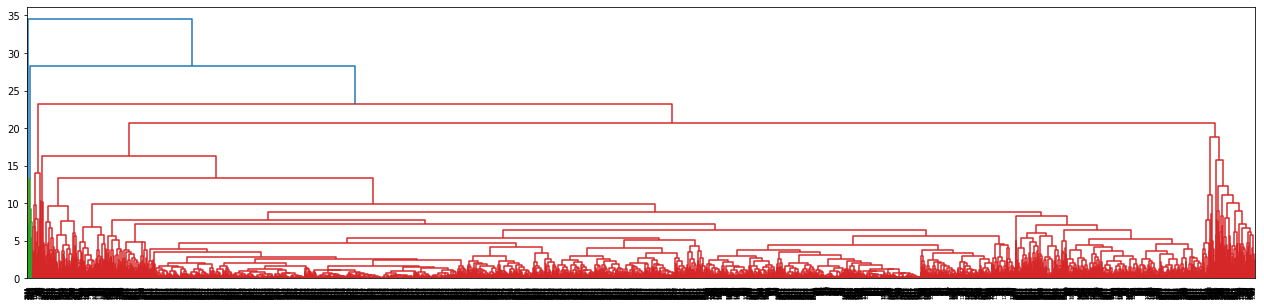

In [57]:
#Create Dendrogram
plt.figure(figsize=(22,5))
dendrogram= sch.dendrogram(sch.linkage(airlines_scaled,method='complete'))


In [58]:
#Creating Clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc.fit(airlines_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [59]:
#Saving clusters for chart.
y_hc=hc.fit_predict(airlines_scaled)
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
airlines_hierarchical=airlines.copy()

#adding clusterid col
airlines_hierarchical['h_clusterid']=y_hc
airlines_hierarchical.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [61]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
42,60313,0,1,1,1,10000,26,3250,9,7829,1,0
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0
59,95118,0,3,1,1,23188,23,2200,7,6865,1,0
65,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3883,126167,0,5,1,1,190160,15,0,0,1612,1,0
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,0


In [62]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [63]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,2
384,28193,0,5,1,4,103456,32,0,0,6980,1,2
850,25629,0,4,1,5,107308,36,600,2,5966,1,2
904,15835,0,2,1,5,112171,16,0,0,5825,1,2
1036,154664,0,4,1,3,73881,33,0,0,5769,0,2
1244,166465,0,4,1,4,98717,30,0,0,5531,0,2
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,2
1878,128302,0,5,1,4,132263,32,400,2,4103,1,2
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,2
1946,126873,0,4,1,5,95598,32,500,1,3880,1,2


In [64]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [65]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
43,619393,0,3,1,1,15008,14,0,0,7819,1,4
72,550367,0,3,1,1,12500,13,50,1,7801,0,4
87,609477,0,3,1,1,21422,22,1200,8,6820,0,4
117,969559,0,1,1,1,2500,3,1000,2,7718,1,4
126,602064,0,5,1,1,194753,26,2250,10,7652,1,4
151,930410,0,5,1,1,211284,18,2250,6,7640,1,4
175,451673,0,4,1,1,43533,19,900,4,7575,1,4
186,707079,0,4,1,1,57173,40,3450,12,7523,1,4
220,1302051,2706,5,1,1,90653,32,3050,7,7467,1,4
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,4


In [69]:
airlines_hierarchical.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
h_clusterid,,,,,,,,,,,
0,117123.664706,255.752941,2.252941,1.341176,1.000000,37437.170588,26.729412,4066.623529,11.882353,4701.688235,0.705882
1,65902.071655,137.370703,2.033580,1.000000,1.000793,15571.369910,10.724484,270.585405,0.818350,4072.294553,0.350344
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143


# K-Means Clustering:

[43989.000000000015, 35409.51145242436, 30899.246824652197, 27446.37245668138, 24541.32958204578, 21089.973628929645, 19165.86145865566, 17316.866446128293, 16043.406242309518, 14726.983322766795]


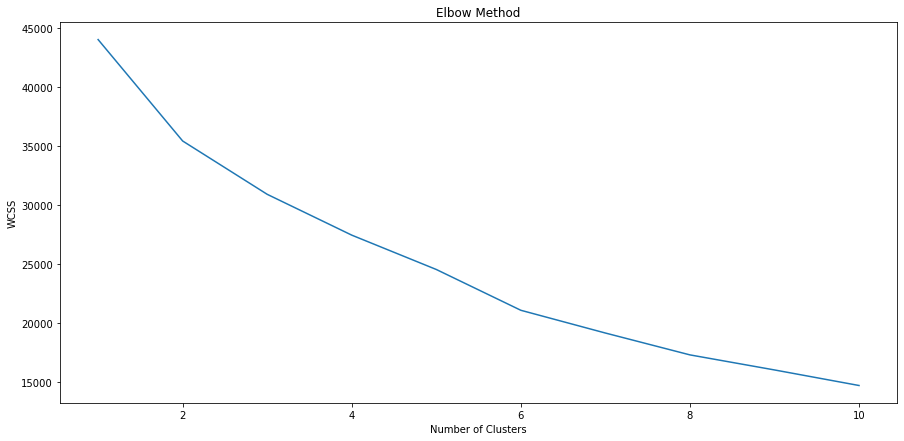

In [71]:
#Elbow Chart 

plt.figure(figsize=(15,7))

wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As per above graph: k=5 will be better for clustering.

## Building Cluster Algorithm

In [72]:
clusters_new= KMeans(5,random_state=0)
clusters_new.fit(airlines_scaled)

KMeans(n_clusters=5, random_state=0)

In [73]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [75]:
#Assign clusters to the data set.
airlines_kmeans=airlines.copy()
airlines_kmeans['kmeans_clusterid']=clusters_new.labels_
airlines_kmeans.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [76]:
airlines_kmeans['kmeans_clusterid'].value_counts()

0    2517
2    1259
1     147
3      61
4      15
Name: kmeans_clusterid, dtype: int64

In [77]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [78]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusterid
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
42,60313,0,1,1,1,10000,26,3250,9,7829,1,1
50,108137,0,1,1,1,6368,5,6368,5,6844,0,1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,1
94,185549,0,5,1,1,110859,39,2950,16,6778,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,1


In [79]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusterid
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,2
3980,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,59017,0,4,1,1,34746,25,0,0,1418,0,2
3991,39142,0,3,1,1,14981,28,0,0,1408,0,2


In [80]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusterid
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,3
315,119977,2556,1,1,1,9275,16,1400,4,7226,1,3
335,278457,6727,4,1,1,57313,27,1000,2,7101,1,3
420,529886,7210,1,1,1,23866,26,7741,15,8296,1,3
532,86520,3445,5,1,1,64450,20,1000,2,6592,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3643,47662,3071,1,1,1,100,1,100,1,760,0,3
3649,41537,3576,1,1,1,3000,3,250,1,669,1,3
3701,8964,3861,1,1,1,0,0,0,0,594,0,3
3747,6015,4929,1,1,1,0,0,0,0,30,0,3


In [81]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_clusterid
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
384,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,15835,0,2,1,5,112171,16,0,0,5825,1,4
1036,154664,0,4,1,3,73881,33,0,0,5769,0,4
1244,166465,0,4,1,4,98717,30,0,0,5531,0,4
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,4
1946,126873,0,4,1,5,95598,32,500,1,3880,1,4


In [82]:
airlines_kmeans.groupby('kmeans_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
kmeans_clusterid,,,,,,,,,,,
0,43438.468415,41.883989,1.222090,1.019468,1.000397,4696.888359,6.930473,199.267382,0.620183,3699.023441,0.200636
1,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721
2,117283.428118,60.254964,3.700556,1.002383,1.001589,39201.023828,18.772836,346.313741,1.035743,4893.776807,0.648133
3,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


# DBSCAN Clustering:

In [84]:
dbscan=DBSCAN(eps=1,min_samples=10)
dbscan.fit_predict(airlines_scaled)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
airlines_dbscan=airlines.copy()
airlines_dbscan['dbscan_clusterid']=dbscan.labels_
airlines_dbscan['dbscan_clusterid'].value_counts()

 0    2281
 1    1033
-1     675
 2      10
Name: dbscan_clusterid, dtype: int64

In [86]:
airlines_dbscan.groupby('dbscan_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
dbscan_clusterid,,,,,,,,,,,
-1,171415.789630,835.048889,2.645926,1.071111,1.072593,37168.734815,20.888889,2019.174815,5.838519,4637.044444,0.663704
0,52122.980710,2.468216,1.649715,1.000000,1.000000,8876.730820,8.348970,106.819816,0.359053,3794.305129,0.000000
1,57560.314618,6.801549,2.591481,1.000000,1.000000,22401.674734,12.715392,225.715392,0.709584,4507.369797,1.000000
2,27372.700000,0.000000,1.000000,2.000000,1.000000,8459.100000,11.700000,0.000000,0.000000,2919.100000,0.000000


In [87]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,dbscan_clusterid
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,205651,500,1,1,1,4025,21,700,4,7932,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,-1
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,-1
3961,131125,862,1,1,1,4993,11,50,1,1443,0,-1
3967,26504,0,2,1,1,10599,29,1000,7,1445,0,-1


In [88]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,dbscan_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [89]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,dbscan_clusterid
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,51890,0,4,1,1,48963,16,0,0,6910,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1


In [90]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,dbscan_clusterid
1541,36887,0,1,2,1,9048,11,0,0,4951,0,2
1976,11961,0,1,2,1,11961,10,0,0,4646,0,2
2317,10458,0,1,2,1,10458,12,0,0,3726,0,2
2421,41062,0,1,2,1,8275,11,0,0,3356,0,2
2741,42970,0,1,2,1,7889,14,0,0,2256,0,2
2906,17769,0,1,2,1,5165,10,0,0,1807,0,2
3155,21736,0,1,2,1,6672,10,0,0,2544,0,2
3191,56624,0,1,2,1,12311,14,0,0,2491,0,2
3359,20318,0,1,2,1,6990,13,0,0,1956,0,2
3959,13942,0,1,2,1,5822,12,0,0,1458,0,2


In [91]:
#Percentage of noise points.
(len(airlines_dbscan[airlines_dbscan['dbscan_clusterid']==-1])/len(airlines_dbscan))*100

16.879219804951237

In [92]:
#Silhouette score.
airlines_scaled=metrics.silhouette_score(airlines_scaled,dbscan.labels_)
airlines_scaled

0.21846817453796039

Therefore,Hierarchical and K-Means both are almost same in considering the clusters as per given data.
Though,DBSCAN is showing some noise points and the silouette score is also not strong enough to go with.